# Naive Bayes Classification with Scikit-Learn

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

## Iris Dataset
In this task, we have to classify three kinds of iris flower based on the length and width of their sepal and petal. These kinds includes Setosa, Versicolor, and Virginica encoded with 0, 1, and 2, respectively.

The dataset for iris classification is avaible in scikit-learn package. To download and use it for our experiment, you can implement it with the following code:

In [14]:
# Downloading the iris dataset
iris = datasets.load_iris()
class_names = iris.target_names
# Convert to pandas format for easier processing
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [15]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Firstly, we randomly split the dataset into training (80%) and testing (20%) set.

In [16]:
# Splitting dataset into train set and test set
X_train, X_test, y_train, y_test = train_test_split(
iris_df[['sepal length (cm)', 'sepal width (cm)',
'petal length (cm)','petal width (cm)']],
iris_df['target'],
test_size=0.2,
random_state=2021)

## Modeling and Results
In this experiment, we build a Naive Bayes Classifier to classify three kinds of iris. We assume the lengths of sepal and petal are following a normal distribution. So we can train a Gaussian Naive Bayes as follows:

In [17]:
# Import Naive Bayes
# In this case, I assume features follow a normal distribution
NB = GaussianNB()
# Train Naive Bayes Model
NB.fit(X_train, y_train)
print("Training accuracy: {:.2f}".format(NB.score(X_train, y_train)))
# Evaluate Model on test set
y_predict = NB.predict(X_test)
print("Testing accuracy NB: {:.2f}".format(NB.score(X_test, y_test)))

Training accuracy: 0.97
Testing accuracy NB: 0.93


After training, our model reaches 93% accuracy on the testing set.

## Results Visualization
Our model is very good at classifying iris species. To verify the prediction, we use Principal Component Analysis (PCA) to reduce the dimensions into 2-dimension for visualization.

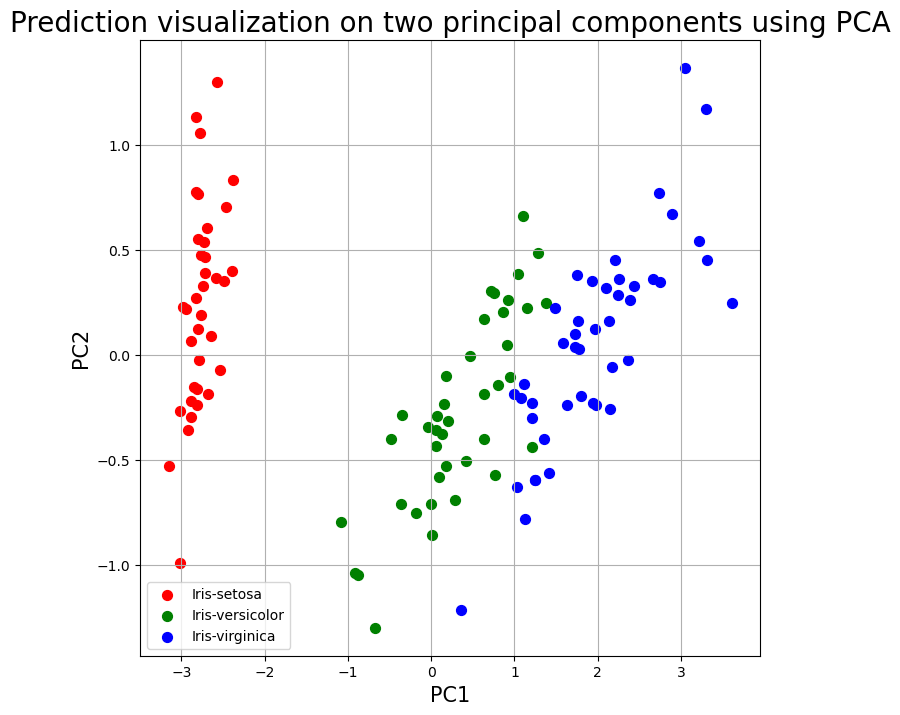

In [18]:
# Visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
finalDf = pd.concat([principalDf, y_train.reset_index(drop=True)], axis=1)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
ax.set_title('Prediction visualization on two principal components using PCA',
fontsize=20)
targets = [0, 1, 2]
targets_2_desc = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'],
    finalDf.loc[indicesToKeep, 'PC2'],
    c=color,
    s=50,
    label=targets_2_desc[target])
ax.legend()
ax.grid()

## Conclusion
In this experiment, we use the bayes model to classify three kinds of iris based on their length and width of petal and sepal. Our approach reaches 93% accuracy on the testing set.